In [1]:
import pandas as pd

In [2]:
# Define the file path
file_path = "../Data_Set/new_df_outliers_only_copy_smote_resampled_noNormalised.csv"

In [3]:
df = pd.read_csv(file_path)

In [4]:
df = pd.read_csv(file_path)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(df.drop('diabetes', axis=1), df['diabetes'], test_size=0.2, random_state=42)

#this code is training a random forest regression model 
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.01662462848595153
R-squared: 0.9334903046968707


Feature Importance

In [6]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = model.feature_importances_

# Get feature names
feature_names = list(df.drop('diabetes', axis=1).columns)

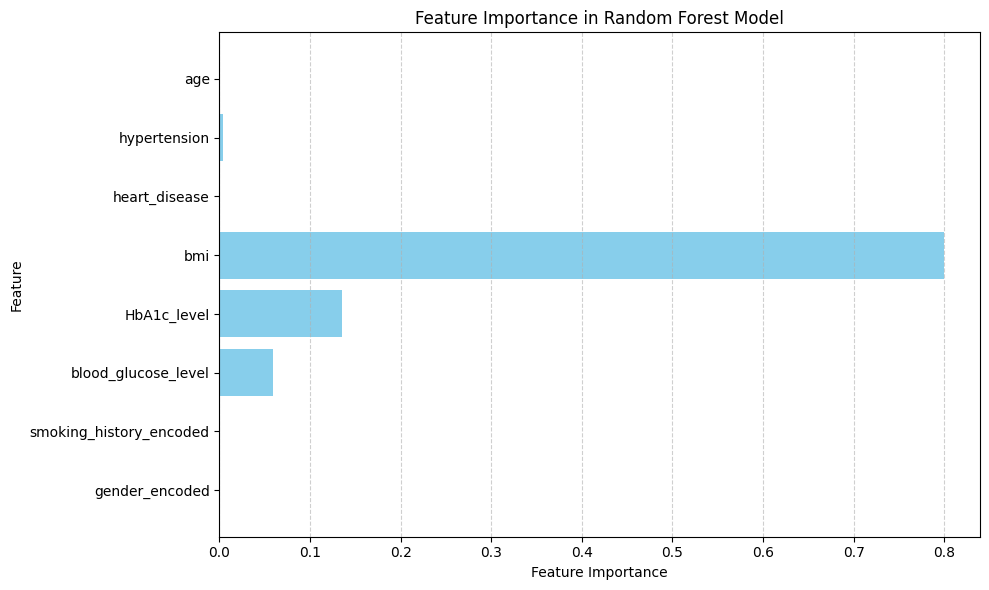

In [7]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()  # Arrange features with highest importance on top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [8]:
correlation_matrix = df.corr()

correlation_matrix

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes
age,1.000000,0.230175,0.268103,-0.479261,0.415650,0.381010,0.095985,0.132283,0.531424
hypertension,0.230175,1.000000,0.095697,-0.174315,0.214574,0.178517,0.059865,0.081884,0.276821
heart_disease,0.268103,0.095697,1.000000,-0.232259,0.194916,0.182405,0.091430,0.125226,0.253478
bmi,-0.479261,-0.174315,-0.232259,1.000000,-0.604075,-0.576645,-0.086272,-0.222563,-0.741374
HbA1c_level,0.415650,0.214574,0.194916,-0.604075,1.000000,0.370773,0.066131,0.178703,0.733712
blood_glucose_level,0.381010,0.178517,0.182405,-0.576645,0.370773,1.000000,0.092828,0.172575,0.705455
smoking_history_encoded,0.095985,0.059865,0.091430,-0.086272,0.066131,0.092828,1.000000,0.080184,0.101054
gender_encoded,0.132283,0.081884,0.125226,-0.222563,0.178703,0.172575,0.080184,1.000000,0.228270
diabetes,0.531424,0.276821,0.253478,-0.741374,0.733712,0.705455,0.101054,0.228270,1.000000


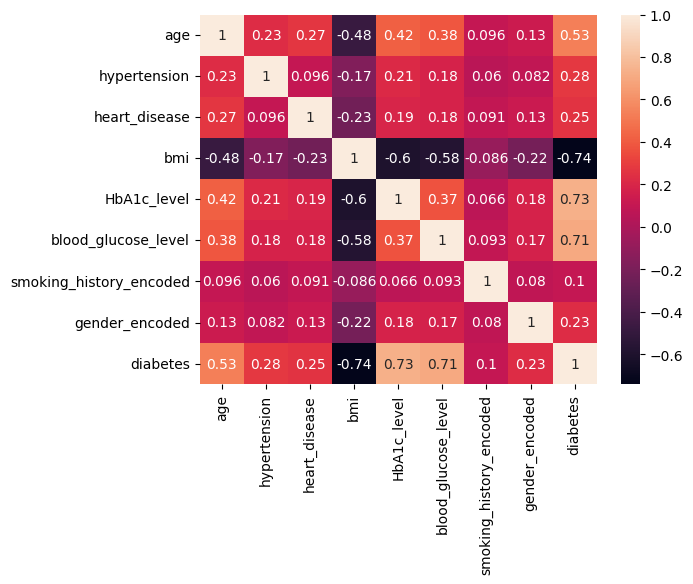

In [9]:
import seaborn as sns

sns.heatmap(correlation_matrix, annot=True)
plt.show()


In [16]:
#the features with most importance is HbA1c, blood_glucose_level, and age 

#making a dataframe with those values only 

import pandas as pd

# Assuming your data is loaded into a pandas DataFrame named 'data'

# List of features you want to select (replace with your actual feature names)
selected_features = ['age', 'hypertension', 'heart_disease','diabetes']

# Create a new DataFrame with only the selected features
df_selected_with_diabetes = df[selected_features]

df_selected_with_diabetes

,age,hypertension,heart_disease,diabetes
0,54.000000,0,0,0
1,34.000000,0,0,0
2,67.000000,0,0,1
3,38.000000,0,0,0
4,30.000000,0,0,0
...,...,...,...,...
6163,58.619390,0,0,0
6164,36.411190,0,0,0
6165,15.709946,0,0,0
6166,40.330285,0,0,0


Supervised Learning Task such as Prediction

Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_selected_with_diabetes[['age', 'hypertension', 'heart_disease']], df_selected_with_diabetes['diabetes'], test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model (replace with desired evaluation metric)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

#evaluate the model using f1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("Logistic Regression F1 Score:", f1)

#evaluate the model using precision score
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("Logistic Regression Precision Score:", precision)

#evaluate the model using recall score
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("Logistic Regression Recall Score:", recall)

Logistic Regression Accuracy: 0.7617504051863857
Logistic Regression F1 Score: 0.760586319218241
Logistic Regression Precision Score: 0.7744610281923715
Logistic Regression Recall Score: 0.7472


Logistic Regression Accuracy: 0.7617504051863857
Logistic Regression Precision: 0.7744610281923715
Logistic Regression Recall: 0.7472
Logistic Regression F1 Score: 0.760586319218241


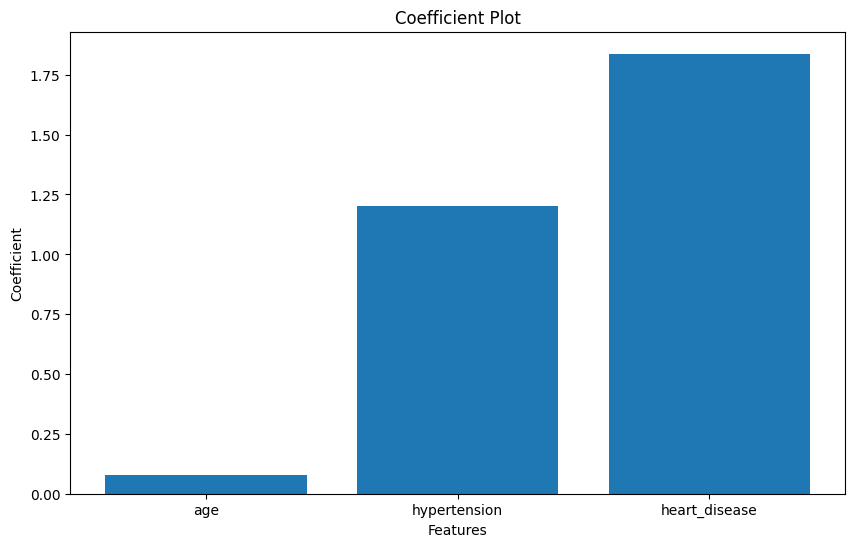

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Split data into features and target variable
X = df_selected_with_diabetes[['age', 'hypertension', 'heart_disease']]
y = df_selected_with_diabetes['diabetes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

#evaluating the regression model using accuracy score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

#evaluating the regression model using precision 
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("Logistic Regression Precision:", precision)

#evaluating the regression model using recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("Logistic Regression Recall:", recall)

#evaluating the regression model using F1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("Logistic Regression F1 Score:", f1)

# Plot coefficient plot
plt.figure(figsize=(10, 6))
plt.bar(X.columns, model.coef_[0])
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Coefficient Plot')
plt.show()

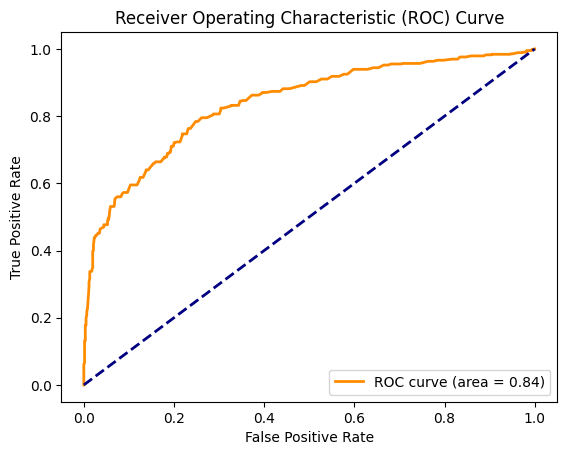

In [21]:
# Plot ROC curve
y_scores = model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Decision Tree Prediction

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Split data into training and testing sets (same as logistic regression)
X_train, X_test, y_train, y_test = train_test_split(df_selected_with_diabetes[['age', 'hypertension', 'heart_disease']], df_selected_with_diabetes['diabetes'], test_size=0.2, random_state=42)

# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)

#evaluating the model using precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("Decision Tree Precision:", precision)

#evaluating the model using recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("Decision Tree Recall:", recall)

#evaluating the model using F1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("Decision Tree F1 Score:", f1)

Decision Tree Accuracy: 0.8144246353322528
Decision Tree Precision: 0.7886297376093294
Decision Tree Recall: 0.8656
Decision Tree F1 Score: 0.8253241800152555


In [24]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [26]:
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=df_selected_with_diabetes.columns[:-1], class_names=['No Diabetes', 'Diabetes'],
max_depth=4)
plt.show()

NameError: name 'plot_tree' is not defined

<Figure size 2000x1000 with 0 Axes>

Random FOrest

In [27]:
df_selected_with_diabetes

,age,hypertension,heart_disease,diabetes
0,54.000000,0,0,0
1,34.000000,0,0,0
2,67.000000,0,0,1
3,38.000000,0,0,0
4,30.000000,0,0,0
...,...,...,...,...
6163,58.619390,0,0,0
6164,36.411190,0,0,0
6165,15.709946,0,0,0
6166,40.330285,0,0,0


In [28]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np 


In [29]:
model = RandomForestRegressor(n_estimators=100, random_state=42)


In [30]:
# Assuming you have a dataset df containing your features and target variable
X_rf = df_selected_with_diabetes.drop(columns=['diabetes'])  # Features
y_rf= df['diabetes']  # Target variable

# Split the dataset into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model.fit(X_train_rf, y_train_rf)

RandomForestRegressor(random_state=42)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_rf = model.predict(X_test_rf)

mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)

print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)

Mean Squared Error: 0.12430812255690345
R-squared: 0.5026839028643413


In [33]:
predictions_rf = model.predict(X_test_rf)